Pada latihan ini, kita akan menggunakan data “Melbourne Housing Snapshot”. Kalian bisa membaca lebih lanjut penjelasan dataset ini di laman [Kaggle berikut](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot).


In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [406]:
df1=pd.read_csv('melb_data2.csv',dtype={'Postcode':str})
# df=pd.read_csv('melb_data2.csv')

pd.set_option('display.max_columns', 500)
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Ascot Vale,2/43 Roxburgh St,2,u,455000.0,S,Nelson,3/09/2016,5.9,3032,3.0,1.0,2.0,0.0,NaN,NaN,Moonee Valley,-37.7756,144.9165,Western Metropolitan,6567.0
1,Ascot Vale,30 Rothwell St,3,h,940000.0,S,Nelson,3/12/2016,5.9,3032,3.0,1.0,2.0,298.0,108.0,1920.0,Moonee Valley,-37.7777,144.9195,Western Metropolitan,6567.0
2,Ascot Vale,9/5 Rothwell St,2,u,467000.0,SP,Brad,3/12/2016,5.9,3032,2.0,1.0,1.0,0.0,62.0,1980.0,Moonee Valley,-37.7761,144.9201,Western Metropolitan,6567.0
3,Ascot Vale,7 Francis St,3,h,1380000.0,SP,Nelson,4/03/2017,5.9,3032,3.0,2.0,2.0,277.0,174.0,1910.0,Moonee Valley,-37.7777,144.9221,Western Metropolitan,6567.0
4,Ascot Vale,2/21 Harold St,2,u,490000.0,VB,Jellis,4/03/2017,5.9,3032,2.0,1.0,1.0,423.0,62.0,1970.0,Moonee Valley,-37.7736,144.9015,Western Metropolitan,6567.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         1129 non-null   object 
 1   Address        1129 non-null   object 
 2   Rooms          1129 non-null   int64  
 3   Type           1129 non-null   object 
 4   Price          1129 non-null   float64
 5   Method         1129 non-null   object 
 6   SellerG        1129 non-null   object 
 7   Date           1129 non-null   object 
 8   Distance       1129 non-null   float64
 9   Postcode       1129 non-null   object 
 10  Bedroom2       1129 non-null   float64
 11  Bathroom       1129 non-null   float64
 12  Car            1113 non-null   float64
 13  Landsize       1129 non-null   float64
 14  BuildingArea   601 non-null    float64
 15  YearBuilt      713 non-null    float64
 16  CouncilArea    1079 non-null   object 
 17  Lattitude      1129 non-null   float64
 18  Longtitu

Gunakan hanya kolom-kolom berikut

In [101]:
df=df[['Suburb','Address','Rooms','Type','Price','Distance','Landsize','Bedroom2','BuildingArea','Regionname']]
df.head()

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
0,Ascot Vale,2/43 Roxburgh St,2,u,455000.0,5.9,0.0,3.0,NaN,Western Metropolitan
1,Ascot Vale,30 Rothwell St,3,h,940000.0,5.9,298.0,3.0,108.0,Western Metropolitan
2,Ascot Vale,9/5 Rothwell St,2,u,467000.0,5.9,0.0,2.0,62.0,Western Metropolitan
3,Ascot Vale,7 Francis St,3,h,1380000.0,5.9,277.0,3.0,174.0,Western Metropolitan
4,Ascot Vale,2/21 Harold St,2,u,490000.0,5.9,423.0,2.0,62.0,Western Metropolitan


Sekarang, tugas kalian adalah:  
* Eksplorasi dan berikan gambaran umum dari data di atas (missing value, outliers, descriptive statistics)
    * Coba isi missing value berdasarkan hasil eksplorasi kalian
* Buat analisis sederhana untuk mencari tahu hubungan tiap-tiap variabel dengan kolom `Price`. Lakukan uji statistik untuk mengkonfirmasi temuan kalian!
* Berikan simpulan dari analisis kalian. Saran apa yang bisa kalian berikan **kepada calon pembeli rumah** berdasarkan hasil analisis kalian?

In [102]:
df.info() #Check data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        1129 non-null   object 
 1   Address       1129 non-null   object 
 2   Rooms         1129 non-null   int64  
 3   Type          1129 non-null   object 
 4   Price         1129 non-null   float64
 5   Distance      1129 non-null   float64
 6   Landsize      1129 non-null   float64
 7   Bedroom2      1129 non-null   float64
 8   BuildingArea  601 non-null    float64
 9   Regionname    1129 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 88.3+ KB


# 1. Handling Missing Value

## 1.1 Handling Value Rooms dan Bedroom2

In [8]:
df['Type'].unique()

array(['u', 'h', 't'], dtype=object)

In [9]:
df['Bedroom2'].unique()

array([3., 2., 4., 6., 1., 5., 0.])

In [10]:
df['Rooms'].unique()

array([2, 3, 4, 6, 1, 5], dtype=int64)

In [103]:
#Asumsi bahwa jumlah room > jumlah bedroom, karena tidak mungkin di dalam satu rumah ruangannya hanya ada bedroom saja
#Sehingga jumlah room yang baru adalah jumlah room yang lama ditambah dengan jumlah bedroom
#Asumsi bahwa bedroom2 merupakan data terbaru hasil scarpping si pembuat database
df['Rooms']=df['Rooms']+df['Bedroom2']

In [104]:
df.head()

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
0,Ascot Vale,2/43 Roxburgh St,5.0,u,455000.0,5.9,0.0,3.0,NaN,Western Metropolitan
1,Ascot Vale,30 Rothwell St,6.0,h,940000.0,5.9,298.0,3.0,108.0,Western Metropolitan
2,Ascot Vale,9/5 Rothwell St,4.0,u,467000.0,5.9,0.0,2.0,62.0,Western Metropolitan
3,Ascot Vale,7 Francis St,6.0,h,1380000.0,5.9,277.0,3.0,174.0,Western Metropolitan
4,Ascot Vale,2/21 Harold St,4.0,u,490000.0,5.9,423.0,2.0,62.0,Western Metropolitan


## 1.2 Handling Missing Value Building Area

In [105]:
df.groupby(['Type','Rooms']).mean()

Price  Distance     Landsize  Bedroom2  BuildingArea
Type Rooms                                                             
h    2.0    9.201667e+05  3.133333   146.666667  1.000000           NaN
     3.0    1.765000e+06  3.500000   262.500000  1.000000    172.000000
     4.0    1.117425e+06  3.751634   208.660131  2.006536     93.499610
     5.0    1.448075e+06  3.330000   211.650000  2.150000    131.666667
     6.0    1.363625e+06  4.358407   345.212389  2.991150    144.296000
     7.0    1.512700e+06  4.909091   371.272727  3.363636    208.875000
     8.0    1.786881e+06  4.366265   345.325301  3.987952    194.658140
     10.0   1.613286e+06  6.407143   486.142857  4.928571    251.666667
     12.0   2.158333e+06  5.200000   793.000000  6.000000    435.000000
t    2.0    6.050000e+05  3.200000    67.500000  1.000000     46.000000
     4.0    7.486053e+05  4.778947   109.236842  2.000000     97.900000
     5.0    1.277500e+06  4.650000   395.250000  2.500000    138.000000
     6.0    1.084683e+06  4.548780   297.268293  3.000000    135.645217
     8.0    1.575000e+06  3.766667    41.000000  4.000000     79.500000
     10.0   1.000000e+06  8.700000    98.000000  5.000000           NaN
u    2.0    4.464356e+05  2.955303   495.439394  0.984848     55.686154
     3.0    4.798800e+05  3.110000   518.700000  1.500000     64.200000
     4.0    6.682317e+05  3.261250  1242.012500  2.000000     78.041808
     5.0    6.690000e+05  3.100000     0.000000  2.250000     93.000000
     6.0    1.107100e+06  3.042000   779.620000  3.000000    131.173913
     8.0    1.535000e+06  2.125000   244.750000  4.000000    187.000000

In [106]:
df['BuildingArea']=df.groupby(['Type','Rooms'])['BuildingArea'].apply(lambda x: x.fillna(x.mean()))

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        1129 non-null   object 
 1   Address       1129 non-null   object 
 2   Rooms         1129 non-null   float64
 3   Type          1129 non-null   object 
 4   Price         1129 non-null   float64
 5   Distance      1129 non-null   float64
 6   Landsize      1129 non-null   float64
 7   Bedroom2      1129 non-null   float64
 8   BuildingArea  1122 non-null   float64
 9   Regionname    1129 non-null   object 
dtypes: float64(6), object(4)
memory usage: 88.3+ KB


In [108]:
df['BuildingArea']=df.groupby('Type')['BuildingArea'].apply(lambda x: x.fillna(x.mean()))

In [109]:
df.info() #no-null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        1129 non-null   object 
 1   Address       1129 non-null   object 
 2   Rooms         1129 non-null   float64
 3   Type          1129 non-null   object 
 4   Price         1129 non-null   float64
 5   Distance      1129 non-null   float64
 6   Landsize      1129 non-null   float64
 7   Bedroom2      1129 non-null   float64
 8   BuildingArea  1129 non-null   float64
 9   Regionname    1129 non-null   object 
dtypes: float64(6), object(4)
memory usage: 88.3+ KB


## 1.3 Handling Value 0 pada data Landsize dengan Type 't' dan 'h'

### 1.3.1 Landsize Type 't'

In [110]:
df[(df['Landsize']==0) & (df['Type']=='t')] #Check data Landsize=0 pada Type t

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
189,Kensington,33 Rourke La,4.0,t,770000.0,4.2,0.0,2.0,97.900000,Northern Metropolitan
214,Kensington,1/5 Wight St,4.0,t,773000.0,4.2,0.0,2.0,90.000000,Northern Metropolitan
229,Maribyrnong,8/42 Wests Rd,4.0,t,355000.0,8.7,0.0,2.0,88.000000,Western Metropolitan
252,Maribyrnong,2/105 Raleigh Rd,4.0,t,479000.0,8.7,0.0,2.0,97.900000,Western Metropolitan
253,Maribyrnong,3/105 Raleigh Rd,4.0,t,470000.0,8.7,0.0,2.0,97.900000,Western Metropolitan
348,North Melbourne,2/100 Curzon St,4.0,t,888000.0,2.3,0.0,2.0,97.900000,Northern Metropolitan
360,North Melbourne,8/201 Abbotsford St,4.0,t,1300000.0,2.3,0.0,2.0,97.900000,Northern Metropolitan
482,Port Melbourne,11/201 Graham St,4.0,t,779000.0,3.8,0.0,2.0,97.900000,Southern Metropolitan
495,Port Melbourne,137 Ingles St,6.0,t,950000.0,3.8,0.0,3.0,134.000000,Southern Metropolitan
642,South Yarra,2/28 Walsh St,5.0,t,1715000.0,3.3,0.0,2.0,138.000000,Southern Metropolitan


In [111]:
t_value=df[(df['Landsize']==0) & (df['Type']=='t')].index #Memasukan index kedalam t_value

In [112]:
df.loc[t_value,'Landsize']=df[(df['Landsize']==0) & (df['Type']=='t')]['Landsize'].apply(lambda x: np.nan) 
#Mengganti dengan nilai NaN

### 1.3.2 Landsize Type 'h'

In [113]:
df[(df['Landsize']==0) & (df['Type']=='h')]

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
19,Ascot Vale,2/78 Ormond Rd,4.0,h,636500.0,5.9,0.0,2.0,93.49961,Western Metropolitan
123,Flemington,1/116 Edinburgh St,4.0,h,715000.0,4.4,0.0,2.0,93.49961,Northern Metropolitan
136,Flemington,1/4 Chatham St,6.0,h,1205000.0,4.4,0.0,3.0,144.29600,Northern Metropolitan
139,Flemington,7/30 Bryant St,2.0,h,250000.0,4.4,0.0,1.0,142.92237,Northern Metropolitan
141,Flemington,12 John St,4.0,h,845000.0,4.4,0.0,2.0,93.49961,Northern Metropolitan
190,Kensington,12 Hardiman St,6.0,h,1135000.0,4.2,0.0,3.0,144.29600,Northern Metropolitan
191,Kensington,36 The Crescent,8.0,h,975000.0,4.2,0.0,4.0,194.65814,Northern Metropolitan
259,Maribyrnong,7/13 Navigator St,4.0,h,335000.0,8.7,0.0,2.0,99.00000,Western Metropolitan
384,Parkville,9/18 Lennon St,2.0,h,307000.0,2.6,0.0,1.0,142.92237,Northern Metropolitan
403,Port Melbourne,171 Bridge St,4.0,h,1240000.0,3.8,0.0,2.0,93.49961,Southern Metropolitan


In [114]:
h_value=df[(df['Landsize']==0) & (df['Type']=='h')].index #Memasukan index kedalam h_value

In [115]:
df.loc[h_value,'Landsize']=df[(df['Landsize']==0) & (df['Type']=='h')]['Landsize'].apply(lambda x: np.nan) 
#Mengganti dengan nilai NaN

In [116]:
df.info() #Ada beberapa nilai Landsize yang bernilai NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        1129 non-null   object 
 1   Address       1129 non-null   object 
 2   Rooms         1129 non-null   float64
 3   Type          1129 non-null   object 
 4   Price         1129 non-null   float64
 5   Distance      1129 non-null   float64
 6   Landsize      1086 non-null   float64
 7   Bedroom2      1129 non-null   float64
 8   BuildingArea  1129 non-null   float64
 9   Regionname    1129 non-null   object 
dtypes: float64(6), object(4)
memory usage: 88.3+ KB


### 1.3.3 Handling Missing Value pada data Landsize

In [117]:
df.groupby('Type').mean()

,Rooms,Price,Distance,Landsize,Bedroom2,BuildingArea
Type,,,,,,
h,5.797297,1.372914e+06,4.195174,316.925553,2.874517,142.922370
t,5.054945,9.469670e+05,4.609890,266.826087,2.527473,113.957266
u,3.703846,6.571797e+05,3.149615,976.901923,1.846154,78.162782


In [118]:
df['Landsize']=df.groupby('Type')['Landsize'].apply(lambda x: x.fillna(x.mean()))

In [119]:
df[(df['Landsize']==0) & (df['Type']=='t')]

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname


In [120]:
df[(df['Landsize']==0) & (df['Type']=='h')]

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname


## 1.4 Handling Value 0 pada data Building Area dengan Type 't'

In [121]:
df[(df['BuildingArea']==0) & (df['Type']=='t')]  #Check data BuildingArea=0 pada Type t

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
336,North Melbourne,19 Shands La,4.0,t,841000.0,2.3,215.0,2.0,0.0,Northern Metropolitan
1127,Port Melbourne,44 Garton St,8.0,t,2455000.0,3.5,123.0,4.0,0.0,Southern Metropolitan


In [122]:
t_value=df[(df['BuildingArea']==0) & (df['Type']=='t')].index #Memasukan index kedalam h_value

In [123]:
df.loc[t_value,'BuildingArea']=df[(df['BuildingArea']==0) & (df['Type']=='t')]['BuildingArea'].apply(lambda x: np.nan) 
#Mengganti dengan nilai NaN

In [124]:
df['BuildingArea']=df.groupby('Type')['BuildingArea'].apply(lambda x: x.fillna(x.mean()))

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        1129 non-null   object 
 1   Address       1129 non-null   object 
 2   Rooms         1129 non-null   float64
 3   Type          1129 non-null   object 
 4   Price         1129 non-null   float64
 5   Distance      1129 non-null   float64
 6   Landsize      1129 non-null   float64
 7   Bedroom2      1129 non-null   float64
 8   BuildingArea  1129 non-null   float64
 9   Regionname    1129 non-null   object 
dtypes: float64(6), object(4)
memory usage: 88.3+ KB


In [126]:
df[(df['BuildingArea']==0) & (df['Type']=='t')]

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname


# 2. Descriptive Statistic, Distribusi Data, dan Outliers

## 2.1 Descriptive Statistic

In [127]:
df.describe()

,Rooms,Price,Distance,Landsize,Bedroom2,BuildingArea
count,1129.000000,1.129000e+03,1129.000000,1129.000000,1129.000000,1129.000000
mean,4.773251,1.008926e+06,3.747033,616.862365,2.372896,110.966857
std,1.754415,5.865173e+05,1.774492,2373.683578,0.882257,53.638020
min,2.000000,2.100000e+05,0.000000,0.000000,0.000000,1.000000
25%,4.000000,5.700000e+05,2.700000,0.000000,2.000000,78.041808
50%,4.000000,8.880000e+05,3.400000,163.000000,2.000000,93.499610
75%,6.000000,1.280000e+06,4.300000,321.000000,3.000000,144.296000
max,12.000000,5.700000e+06,8.700000,37000.000000,6.000000,450.000000


In [128]:
df.describe(include=object)

,Suburb,Address,Type,Regionname
count,1129,1129,1129,1129
unique,17,1115,3,3
top,South Yarra,11 Nottingham St,u,Northern Metropolitan
freq,202,2,520,494


## 2.2 Distribusi Data

In [280]:
#Melihat jenis distribusi data pada setiap kolom yang mempunyai data numerik

from scipy.stats import shapiro
def dist(data):
    tstats,pval=shapiro(data)
    if pval<0.05:
        print(pval)
        print('Data tidak terdistribusi secara normal')
        print('\n')
    else:
        print(pval)
        print('Data tidak terdistribusi secara normal')
        print('\n')

dist(df['Rooms'])
dist(df['Price'])
dist(df['Distance'])
dist(df['Landsize'])
dist(df['Bedroom2'])
dist(df['BuildingArea'])

1.30689513424986e-28
Data tidak terdistribusi secara normal


8.001825144917476e-31
Data tidak terdistribusi secara normal


6.826237205936953e-29
Data tidak terdistribusi secara normal


0.0
Data tidak terdistribusi secara normal


1.5031743285094854e-29
Data tidak terdistribusi secara normal


1.6682450919118416e-28
Data tidak terdistribusi secara normal




### **Data numerik pada DataFrame semuanya tidak terdistribusi secara normal**

Text(0.5, 1.0, 'Histogram of Rooms Data')

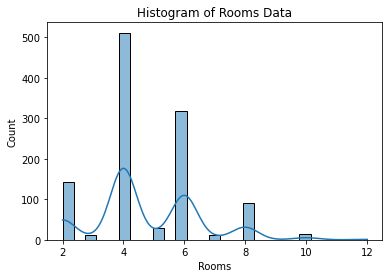

In [130]:
sns.histplot(df['Rooms'], kde=True)
plt.title('Histogram of Rooms Data')

Text(0.5, 1.0, 'Histogram of Price Data')

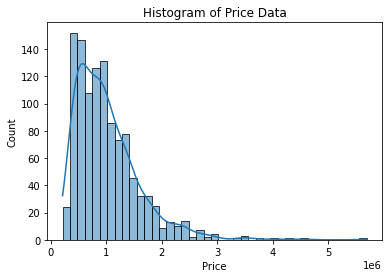

In [131]:
sns.histplot(df['Price'], kde=True)
plt.title('Histogram of Price Data')

Text(0.5, 1.0, 'Histogram of Distance Data')

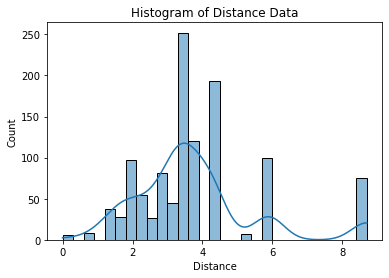

In [132]:
sns.histplot(df['Distance'], kde=True)
plt.title('Histogram of Distance Data')

Text(0.5, 1.0, 'Histogram of Landsize Data')

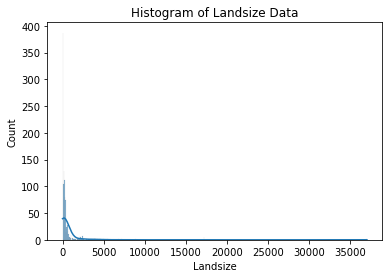

In [133]:
sns.histplot(df['Landsize'], kde=True)
plt.title('Histogram of Landsize Data')

Text(0.5, 1.0, 'Histogram of Bedroom2 Data')

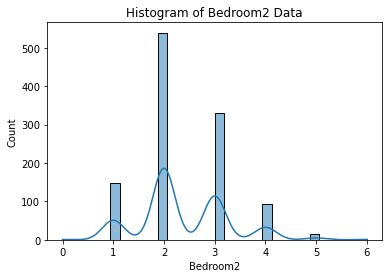

In [134]:
sns.histplot(df['Bedroom2'], kde=True)
plt.title('Histogram of Bedroom2 Data')

Text(0.5, 1.0, 'Histogram of Building Area Data')

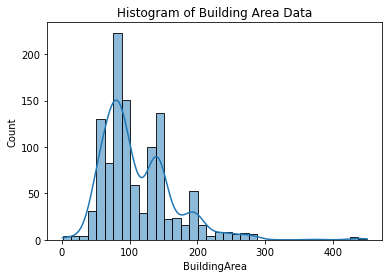

In [135]:
sns.histplot(df['BuildingArea'], kde=True)
plt.title('Histogram of Building Area Data')

## 2.3 Outliers

In [136]:
def outliers(data):
    q1=data.quantile(.25)
    q3=data.quantile(.75)
    iqr=q3-q1
    batas_bawah = q1-1.5*iqr
    batas_atas = q3+1.5*iqr
    A=[]
    for i in range(len(data)):
        if (data.loc[i] < batas_bawah) | (data.loc[i] > batas_atas):
            A.append(data.loc[i])
    if len(A) != 0:
        print(f'Terdapat outliers pada data sebanyak {len(A)} buah data')
    else:
        print('Tidak terdapat outliers pada data')
    return(A)

In [157]:
df['Regionname'].unique()

array(['Western Metropolitan', 'Northern Metropolitan',
       'Southern Metropolitan'], dtype=object)

In [156]:
df['Suburb'].unique()

array(['Ascot Vale', 'Carlton North', 'Flemington', 'Kensington',
       'Maribyrnong', 'Melbourne', 'North Melbourne', 'Parkville',
       'Port Melbourne', 'South Yarra', 'Southbank', 'West Melbourne',
       'Carlton', 'East Melbourne', 'Docklands', 'Travancore',
       'Princes Hill'], dtype=object)

In [161]:
df['Type'].unique()

array(['u', 'h', 't'], dtype=object)

In [137]:
outliers(df['Rooms'])

Terdapat outliers pada data sebanyak 18 buah data


[12.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 12.0,
 10.0,
 10.0,
 12.0,
 10.0,
 10.0,
 10.0]

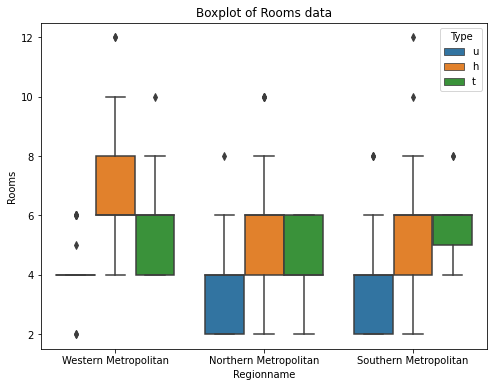

In [323]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Regionname', y='Rooms', hue='Type')
plt.title('Boxplot of Rooms data')
plt.show()

In [139]:
outliers(df['Price'])

Terdapat outliers pada data sebanyak 39 buah data


[2425000.0,
 2950000.0,
 2718000.0,
 2400000.0,
 2520000.0,
 2920000.0,
 2375000.0,
 2350000.0,
 2460000.0,
 3705000.0,
 2430000.0,
 5700000.0,
 2695000.0,
 2870000.0,
 3000000.0,
 2600000.0,
 2395000.0,
 2667000.0,
 2400000.0,
 2370000.0,
 2705000.0,
 4525000.0,
 3520000.0,
 3450000.0,
 2450000.0,
 3970000.0,
 2790000.0,
 2400000.0,
 2700000.0,
 3475000.0,
 4275000.0,
 2450000.0,
 2400000.0,
 2400000.0,
 2920000.0,
 2730000.0,
 2625000.0,
 3400000.0,
 2455000.0]

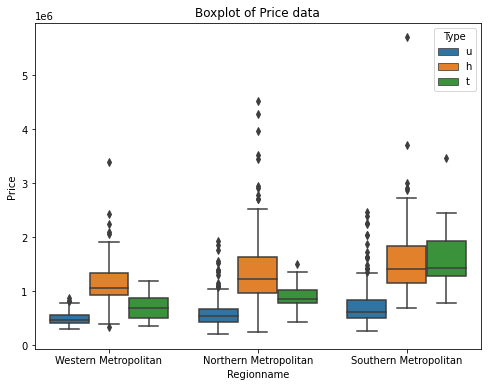

In [324]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Regionname', y='Price', hue='Type')
plt.title('Boxplot of Price data')
plt.show()

In [141]:
outliers(df['Distance'])

Terdapat outliers pada data sebanyak 81 buah data


[8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

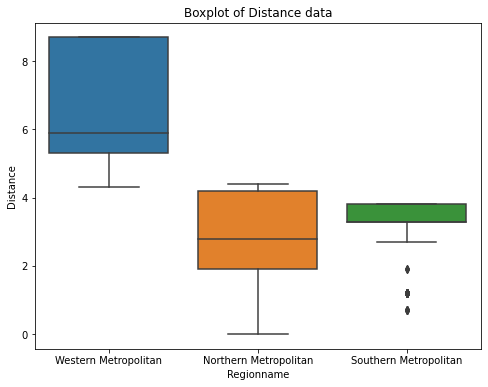

In [330]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Regionname', y='Distance')
plt.title('Boxplot of Distance data')
plt.show()

In [143]:
outliers(df['Landsize'])

Terdapat outliers pada data sebanyak 125 buah data


[1014.0,
 1957.0,
 1031.0,
 861.0,
 2077.0,
 818.0,
 4267.0,
 4440.0,
 3448.0,
 3957.0,
 1111.0,
 1181.0,
 2136.0,
 5661.0,
 904.0,
 950.0,
 3967.0,
 1396.0,
 865.0,
 37000.0,
 4977.0,
 3014.0,
 926.0,
 3014.0,
 4230.0,
 1414.0,
 4051.0,
 1136.0,
 1751.0,
 1045.0,
 1588.0,
 2300.0,
 1004.0,
 2469.0,
 2427.0,
 2488.0,
 2431.0,
 2401.0,
 2193.0,
 21700.0,
 2166.0,
 995.0,
 2166.0,
 2166.0,
 6866.0,
 5042.0,
 2143.0,
 14500.0,
 17200.0,
 1302.0,
 1369.0,
 1283.0,
 1424.0,
 2122.0,
 6111.0,
 979.0,
 855.0,
 17200.0,
 1826.0,
 2121.0,
 3878.0,
 2295.0,
 3878.0,
 2955.0,
 3455.0,
 1012.0,
 1136.0,
 2166.0,
 7159.0,
 21715.0,
 5467.0,
 17200.0,
 3197.0,
 4076.0,
 944.0,
 2581.0,
 2592.0,
 2135.0,
 2592.0,
 4563.0,
 37000.0,
 2431.0,
 6830.0,
 1472.0,
 2135.0,
 887.0,
 2429.0,
 2431.0,
 1272.0,
 8888.0,
 3878.0,
 3481.0,
 1489.0,
 2592.0,
 1223.0,
 1223.0,
 1890.0,
 4977.0,
 2431.0,
 913.0,
 3634.0,
 4267.0,
 2135.0,
 2166.0,
 876.0,
 17200.0,
 997.0,
 1618.0,
 2905.0,
 1727.0,
 1017.0,
 16000

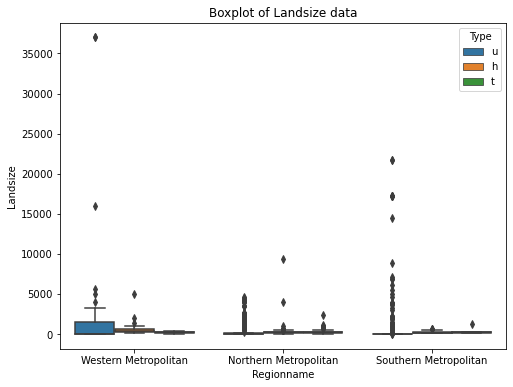

In [326]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Regionname', y='Landsize', hue='Type')
plt.title('Boxplot of Landsize data')
plt.show()

In [145]:
outliers(df['Bedroom2'])

Terdapat outliers pada data sebanyak 19 buah data


[6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 0.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 0.0]

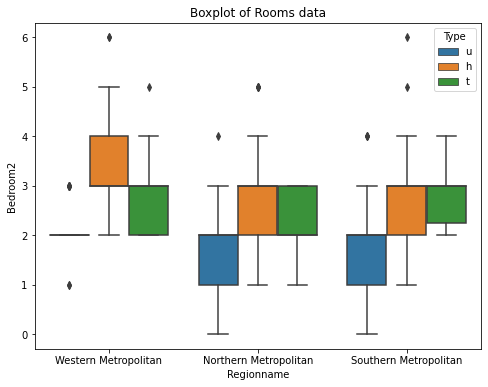

In [331]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Regionname', y='Bedroom2', hue='Type')
plt.title('Boxplot of Rooms data')
plt.show()

In [147]:
outliers(df['BuildingArea'])

Terdapat outliers pada data sebanyak 28 buah data


[270.0,
 435.0,
 286.0,
 251.66666666666666,
 273.0,
 270.0,
 270.0,
 251.66666666666666,
 286.0,
 251.66666666666666,
 374.0,
 245.0,
 251.66666666666666,
 276.0,
 249.0,
 435.0,
 280.0,
 450.0,
 272.0,
 280.0,
 279.0,
 274.0,
 435.0,
 251.66666666666666,
 274.0,
 245.0,
 249.0,
 254.0]

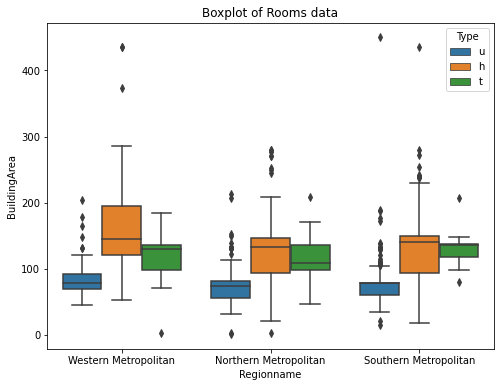

In [328]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Regionname', y='BuildingArea', hue='Type')
plt.title('Boxplot of Rooms data')
plt.show()

# 3. Hubungan tiap variabel dengan Price

## 3.1 Korelasi antar data numerik

In [149]:
corr_price=df[['Price','Rooms','Distance','Landsize','Bedroom2','BuildingArea']].corr(method='spearman')
corr_price

,Price,Rooms,Distance,Landsize,Bedroom2,BuildingArea
Price,1.000000,0.709011,0.041223,0.353038,0.686932,0.752482
Rooms,0.709011,1.000000,0.263965,0.380260,0.985988,0.847087
Distance,0.041223,0.263965,1.000000,0.288228,0.273049,0.264532
Landsize,0.353038,0.380260,0.288228,1.000000,0.368859,0.414343
Bedroom2,0.686932,0.985988,0.273049,0.368859,1.000000,0.830964
BuildingArea,0.752482,0.847087,0.264532,0.414343,0.830964,1.000000


### 3.1.1 Heatmap

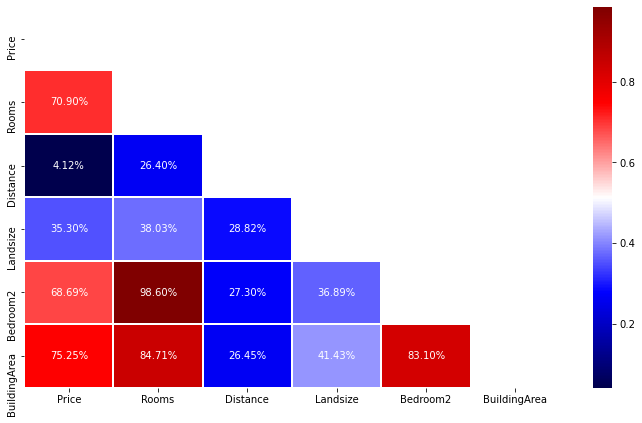

In [318]:
plt.figure(figsize=(12,7))
mask=np.triu(np.ones_like(corr_price))
sns.heatmap(corr_price, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)
plt.show()
#Dapat dilihat dari Heatmap, bahwa Price memiliki korelasi berbanding lurus yang kuat dengan BuildingArea dan Rooms, serta
#Memiliki hubungan yang kuat dengan Bedroom2
#Price memiliki hubungan yang lemah dengan Distance

In [183]:
# Korelasi sedang antara Price dan Landsize diakibatkan karena terdapat Landsize bernilai 0 pada Tipe rumah u, sehingga
# Analisa korelasi Landsize dengan Price harus dipisah antara tipe u - h dan t

df_non_u = df[(df['Type']=='t') | (df['Type']=='h')]
corr_price_2=df_non_u[['Price','Rooms','Distance','Landsize','Bedroom2','BuildingArea']].corr(method='spearman')
corr_price_2

,Price,Rooms,Distance,Landsize,Bedroom2,BuildingArea
Price,1.000000,0.446030,-0.380868,0.202321,0.414322,0.495283
Rooms,0.446030,1.000000,0.146937,0.379965,0.979633,0.780985
Distance,-0.380868,0.146937,1.000000,0.357690,0.160172,0.090309
Landsize,0.202321,0.379965,0.357690,1.000000,0.361335,0.408728
Bedroom2,0.414322,0.979633,0.160172,0.361335,1.000000,0.754480
BuildingArea,0.495283,0.780985,0.090309,0.408728,0.754480,1.000000


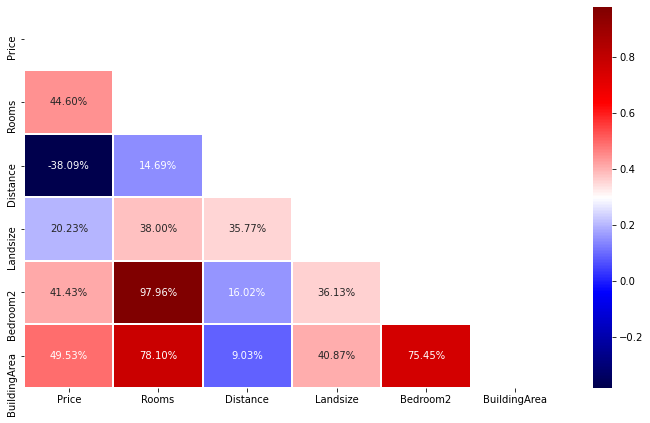

In [319]:
plt.figure(figsize=(12,7))
mask=np.triu(np.ones_like(corr_price_2))
sns.heatmap(corr_price_2, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)
plt.show()

### 3.1.2 Scatterplot dan Regression

### 3.1.2.1 Price dengan Rooms

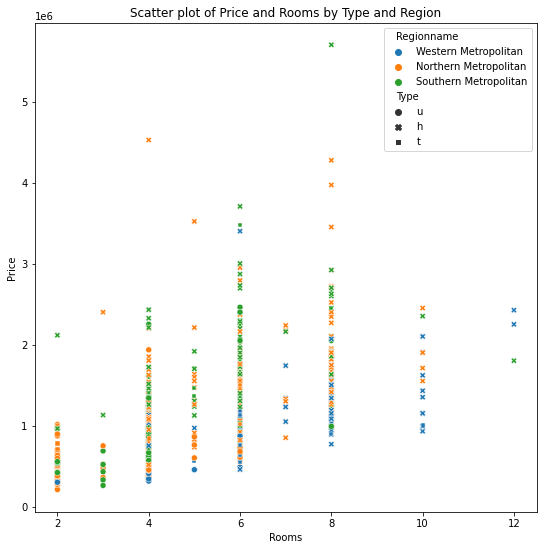

In [301]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=df, x='Rooms', y='Price', hue='Regionname', style='Type')
plt.title('Scatter plot of Price and Rooms by Type and Region', size=12)
plt.show()

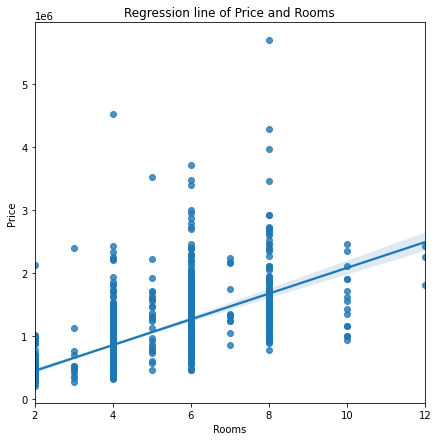

In [304]:
plt.figure(figsize=(7,7))
sns.regplot(data=df, x='Rooms', y='Price')
plt.title('Regression line of Price and Rooms', size=12)
plt.show()

In [309]:
df[['Price','Rooms']].corr(method='spearman')

,Price,Rooms
Price,1.000000,0.709011
Rooms,0.709011,1.000000


### 3.1.2.2 Price dengan Distance

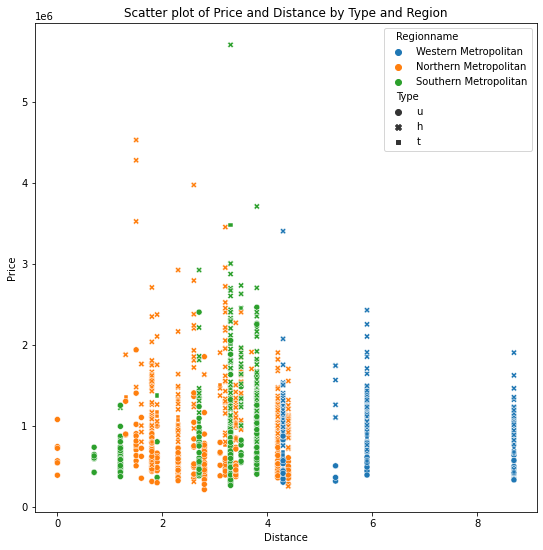

In [303]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=df, x='Distance', y='Price', hue='Regionname', style='Type')
plt.title('Scatter plot of Price and Distance by Type and Region', size=12)
plt.show()

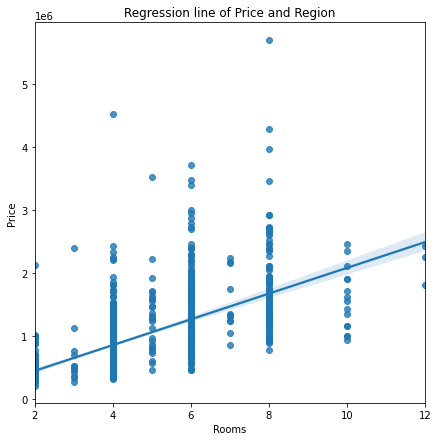

In [305]:
plt.figure(figsize=(7,7))
sns.regplot(data=df, x='Rooms', y='Price')
plt.title('Regression line of Price and Region', size=12)
plt.show()

In [310]:
df[['Price','Distance']].corr(method='spearman')

,Price,Distance
Price,1.000000,0.041223
Distance,0.041223,1.000000


### 3.1.2.3 Price dengan Bedroom2

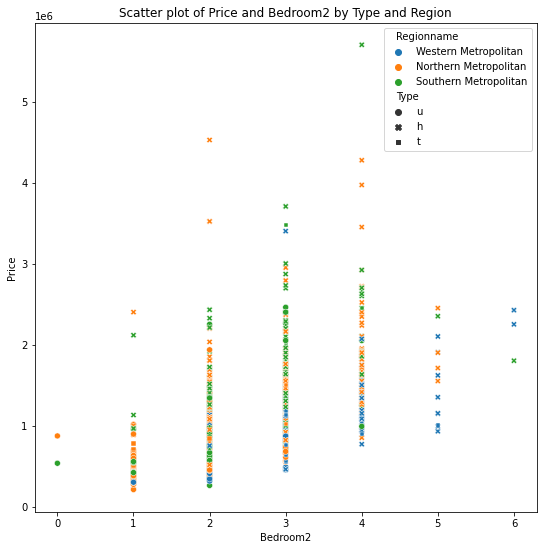

In [212]:
#Price dengan Bedroom2
plt.figure(figsize=(9,9))
sns.scatterplot(data=df, x='Bedroom2', y='Price', hue='Regionname', style='Type')
plt.title('Scatter plot of Price and Bedroom2 by Type and Region', size=12)
plt.show()

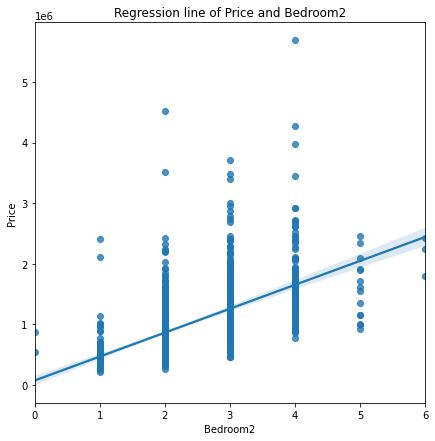

In [306]:
plt.figure(figsize=(7,7))
sns.regplot(data=df, x='Bedroom2', y='Price')
plt.title('Regression line of Price and Bedroom2', size=12)
plt.show()

In [311]:
df[['Price','Bedroom2']].corr(method='spearman')

,Price,Bedroom2
Price,1.000000,0.686932
Bedroom2,0.686932,1.000000


### 3.1.2.4 Price dengan BuildingArea

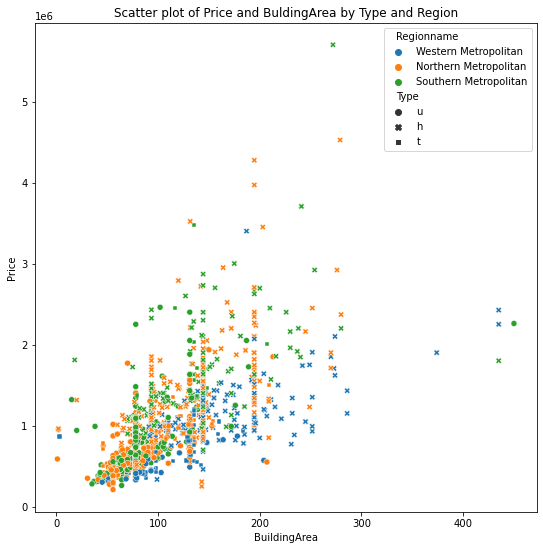

In [213]:
#Price dengan BuildingArea
plt.figure(figsize=(9,9))
sns.scatterplot(data=df, x='BuildingArea', y='Price', hue='Regionname', style='Type')
plt.title('Scatter plot of Price and BuldingArea by Type and Region', size=12)
plt.show()

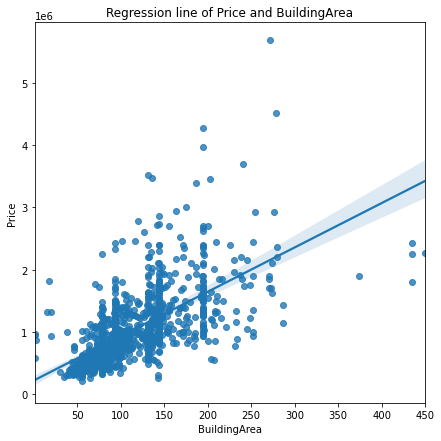

In [307]:
plt.figure(figsize=(7,7))
sns.regplot(data=df, x='BuildingArea', y='Price')
plt.title('Regression line of Price and BuildingArea', size=12)
plt.show()

In [312]:
df[['Price','BuildingArea']].corr(method='spearman')

,Price,BuildingArea
Price,1.000000,0.752482
BuildingArea,0.752482,1.000000


### 3.1.2.5 Price dengan LandsizeArea

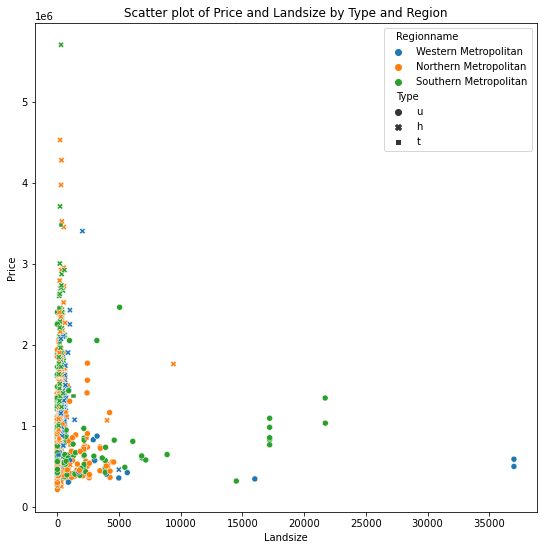

In [240]:
#Price dengan LandsizeArea
plt.figure(figsize=(9,9))
sns.scatterplot(data=df, x='Landsize', y='Price', hue='Regionname', style='Type')
plt.title('Scatter plot of Price and Landsize by Type and Region', size=12)
plt.show()

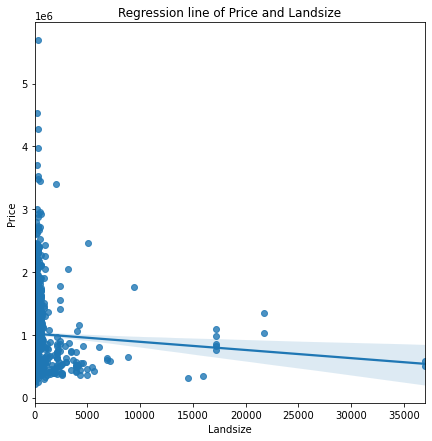

In [308]:
plt.figure(figsize=(7,7))
sns.regplot(data=df, x='Landsize', y='Price')
plt.title('Regression line of Price and Landsize', size=12)
plt.show()

In [313]:
df[['Price','Landsize']].corr(method='spearman')

,Price,Landsize
Price,1.000000,0.353038
Landsize,0.353038,1.000000


## 3.2 Hubungan antar data kategorikal

In [209]:
df.head(n=1)

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
0,Ascot Vale,2/43 Roxburgh St,5.0,u,455000.0,5.9,0.0,3.0,93.0,Western Metropolitan


In [ ]:
# Terdapat 4 data kategorikal, yaitu Suburb, Adress, Type, dan Regionname
# Kita akan menguji masing2 dari data kategori tersebut menggunakan uji statistik, apakah ada perbedaan harga disetiap 
# nilai unik pada 4 data kategori tersebut

### 3.2.1 Price dengan Suburb

In [214]:
df['Suburb'].nunique()

17

In [ ]:
# Terdapat lebih dari 2 jenis data kategori pada Suburb dan data price sendiri tidak terdistribusi secara normal,
# Maka uji statistik yang dipakai adalah uji non-parametrik kruskal wallis

**Hypothesis**     
Ho: Tidak terdapat perbedaan median harga property pada setiap elemen di Suburb      
Ha: Terdapat minimal 1 perbedaan median harga property pada setiap elemen di Suburb

In [215]:
from scipy.stats import kruskal
stats,pval=kruskal(*[df[df['Suburb']==i]['Price'] for i in df['Suburb'].unique()])

print(pval)

if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

1.6040624861205967e-27
Tolak Ho


Karena p value **lebih kecil** dari 0.05, maka kita **punya cukup bukti** untuk menolak Ho, 
artinya terdapat perbedaan harga yang signifikan pada setiap suburb yang berbeda.

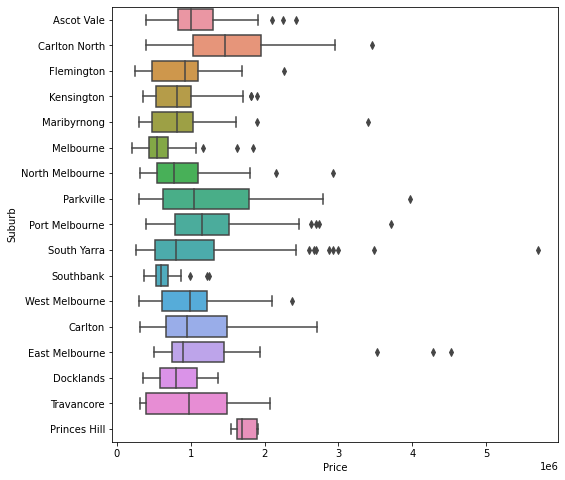

In [222]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='Price', y='Suburb', orient='h')
plt.show()

### 3.2.2 Price dengan Address

In [223]:
df['Address'].nunique()

1115

In [ ]:
# Terdapat lebih dari 2 jenis data kategori pada Address dan data price sendiri tidak terdistribusi secara normal,
# Maka uji statistik yang dipakai adalah uji non-parametrik kruskal wallis

**Hypothesis**     
Ho: Tidak terdapat perbedaan median harga property pada setiap elemen di Address      
Ha: Terdapat minimal 1 perbedaan median harga property pada setiap elemen di Address

In [225]:
from scipy.stats import kruskal
stats,pval=kruskal(*[df[df['Address']==i]['Price'] for i in df['Address'].unique()])

print(pval)

if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

0.37952512879307093
Terima Ho


Karena p value **lebih besar** dari 0.05, maka kita **tidak punya cukup bukti** untuk menolak Ho, 
artinya tidak terdapat perbedaan harga yang signifikan pada setiap address yang berbeda.

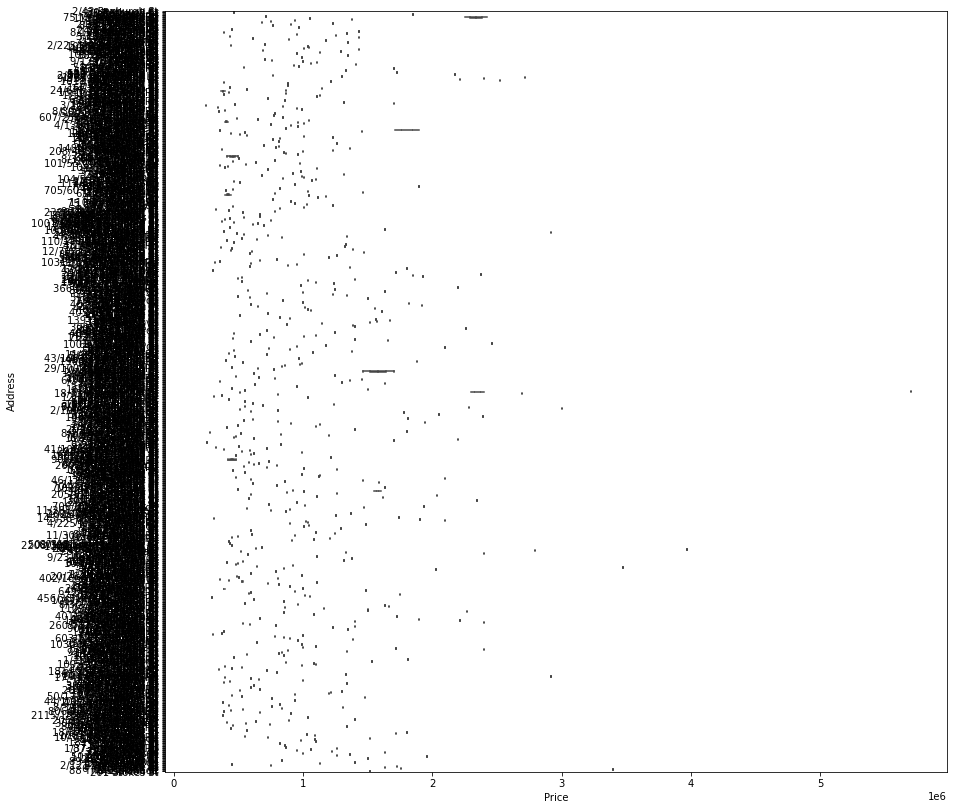

In [226]:
plt.figure(figsize=(14,14))
sns.boxplot(data=df, x='Price', y='Address', orient='h')
plt.show()

### 3.2.3 Price dengan Type

In [227]:
df['Type'].nunique()

3

In [ ]:
# Terdapat lebih dari 2 jenis data kategori pada Type dan data price sendiri tidak terdistribusi secara normal,
# Maka uji statistik yang dipakai adalah uji non-parametrik kruskal wallis

**Hypothesis**     
Ho: Tidak terdapat perbedaan median harga property pada setiap elemen di Type     
Ha: Terdapat minimal 1 perbedaan median harga property pada setiap elemen di Type

In [229]:
from scipy.stats import kruskal
stats,pval=kruskal(*[df[df['Type']==i]['Price'] for i in df['Type'].unique()])

print(pval)

if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

1.0967384044342614e-122
Tolak Ho


Karena p value **lebih kecil** dari 0.05, maka kita **punya cukup bukti** untuk menolak Ho, 
artinya terdapat perbedaan harga yang signifikan pada setiap tipe yang berbeda.

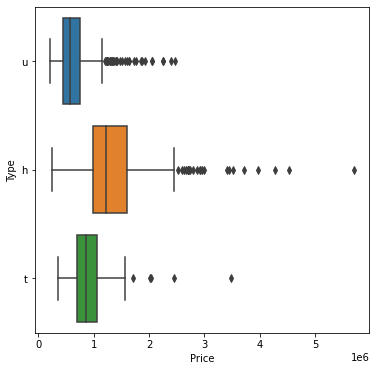

In [233]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='Price', y='Type', orient='h')
plt.show()

### 3.2.4 Price dengan Region Name

In [234]:
df['Regionname'].nunique()

3

In [ ]:
# Terdapat lebih dari 2 jenis data kategori pada Regionname dan data price sendiri tidak terdistribusi secara normal,
# Maka uji statistik yang dipakai adalah uji non-parametrik kruskal wallis

**Hypothesis**     
Ho: Tidak terdapat perbedaan median harga property pada setiap elemen di Region Name     
Ha: Terdapat minimal 1 perbedaan median harga property pada setiap elemen di Region Name

In [235]:
from scipy.stats import kruskal
stats,pval=kruskal(*[df[df['Regionname']==i]['Price'] for i in df['Regionname'].unique()])

print(pval)

if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

0.3358528132188839
Terima Ho


Karena p value **lebih besar** dari 0.05, maka kita **tidak punya cukup bukti** untuk menolak Ho, 
artinya tidak terdapat perbedaan harga yang signifikan pada setiap address yang berbeda.

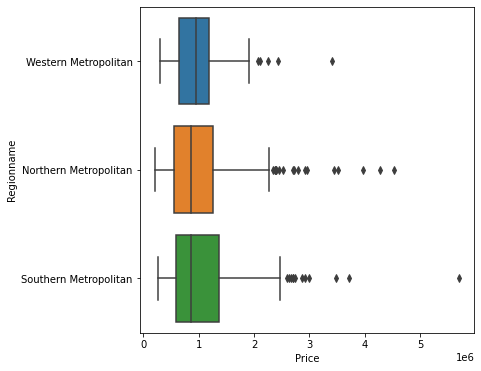

In [236]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='Price', y='Regionname', orient='h')
plt.show()

# 4. Hasil Analisis, Kesimpulan, dan Saran Terhadap Calon Pemberi Rumah

In [360]:
df.head(n=1)

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
0,Ascot Vale,2/43 Roxburgh St,5.0,u,455000.0,5.9,0.0,3.0,93.0,Western Metropolitan


Secara garis besar, data yang dianalisa dapat dibagi menjadi 3 besar kelompok informasi, yaitu:      
**1. Lokasi properti (`Regionname, Suburb, Address, Distance`)**      
**2. Harga properti (`Price`)**         
**3. Spesifikasi properti (`Building Area, Landsize, Rooms, Bedroom, Type`)**     

Ketiga kelompok ini yang kemudian akan dijelaskan kepada calon pembeli properti dan akan diurutkan prioritasnya sesuai dengan keadaan dan keinginan dari calon pembeli properti tersebut. Akan tetapi hanya kelompok `Lokasi properti` dan `Spesifikasi properti` yang akan dibuat prioritasnya, karena `Price` akan selalu menjadi **pembanding disetiap lokasi maupun spesifikasi properti yang ada**

Hal-hal yang harus dipertimbangkan:
1. Di daerah mana pembeli akan membeli rumah
2. Apa aktivitas calon pembeli properti
3. Berapa budget yang dimiliki oleh calon pembeli properti
4. Apa spesifikasi properti yang diinginkan calon pembeli, meliputi:      
    a. Berapa luas bangunan dan jumlah kamar yang diinginkan pada propertinya  
    b. Apakah pembeli ingin ada halaman di rumahnya     

## 4.1. Pemilihan Properti Berdasarkan Lokasi

### 4.1.1 Pemilihan Berdasarkan Region
Kita akan terlebih dahulu menawarkan kepada calon pembeli mengenai Region mana sebaiknya si pembeli akan membeli propertinya, berdasarkan hasil uji statistik, kita dapat melihat bahwa tidak masalah di Region mana si pembeli akan membeli propertinya, karena **Harga rata-rata properti berdasarkan Region sama**

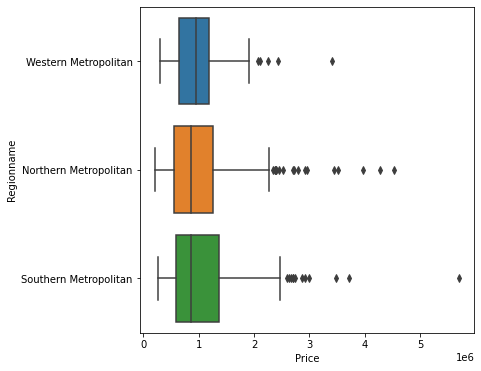

In [237]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='Price', y='Regionname', orient='h')
plt.show()

Berdasarkan perbandingan harga dengan jarak, Region Western Metropolitan memiliki jarak yang lebih jauh dibandingkan dengan Region Northern dan Southern

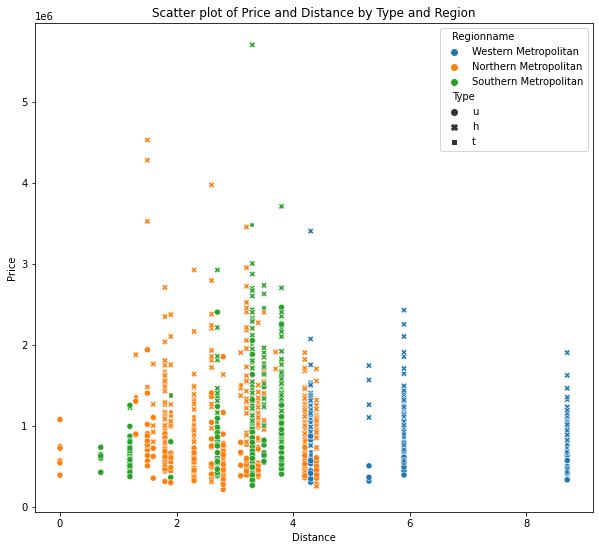

In [380]:
plt.figure(figsize=(10,9))
sns.scatterplot(data=df, x='Distance', y='Price', hue='Regionname', style='Type')
plt.title('Scatter plot of Price and Distance by Type and Region', size=12)
plt.show()

### 4.1.2 Pemilihan Berdasarkan Suburbs
Selanjutnya calon pembeli melihat perbandingan harga suburbs tempat dia akan membeli property, karena **Harga rata-rata properti berdasarkan Suburbs berbeda**.

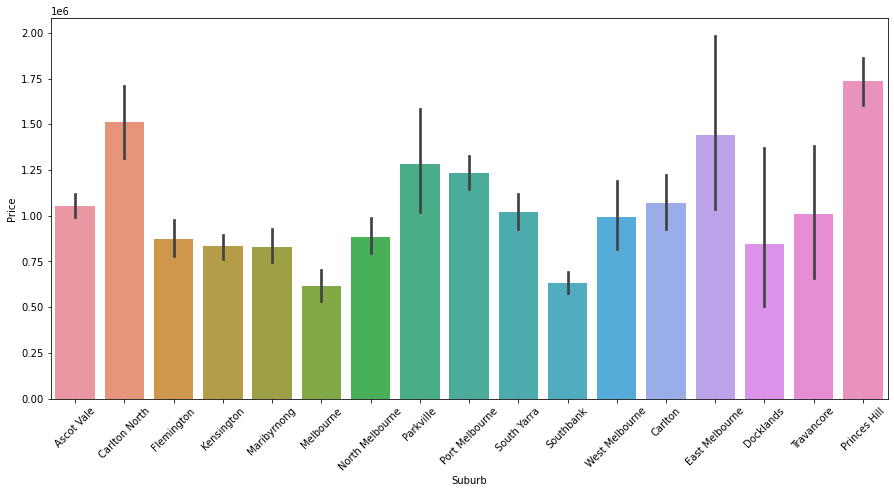

In [387]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='Suburb', y='Price', estimator=np.mean)
plt.xticks(rotation=45)
plt.show()

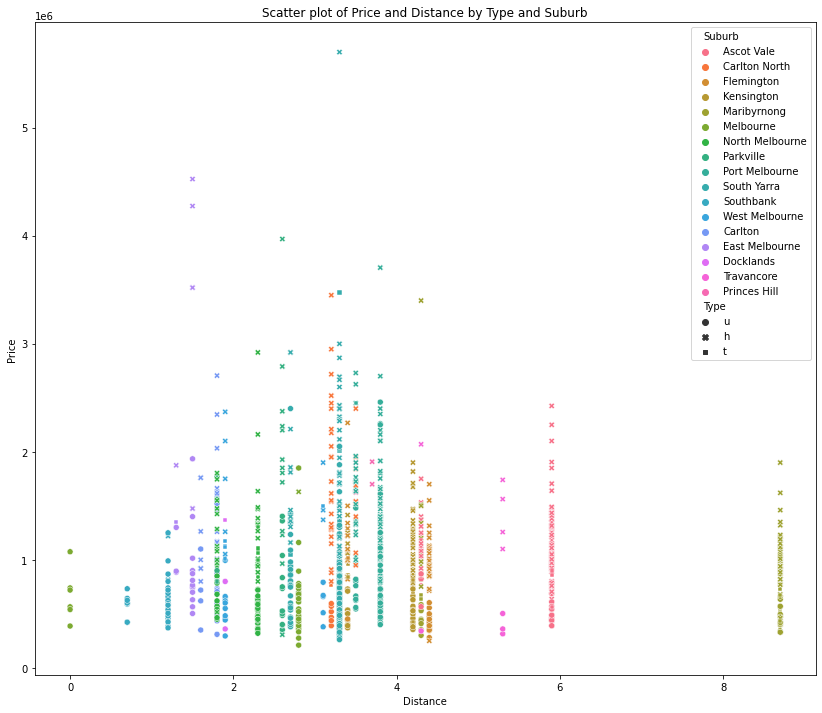

In [391]:
plt.figure(figsize=(14,12))
sns.scatterplot(data=df, x='Distance', y='Price', hue='Suburb', style='Type')
plt.title('Scatter plot of Price and Distance by Type and Suburb', size=12)
plt.show()

### Untuk Address tidak dibandingkan, karena data yang ada terlalu banyak dan menurut hasil uji statistik tidak ada perbedaan harga rumah pada setiap elemen di address

In [392]:
#Northern Metropolitan
n_metro=df[df['Regionname']=='Northern Metropolitan']['Type'].value_counts()
n_metro

h    229
u    224
t     41
Name: Type, dtype: int64

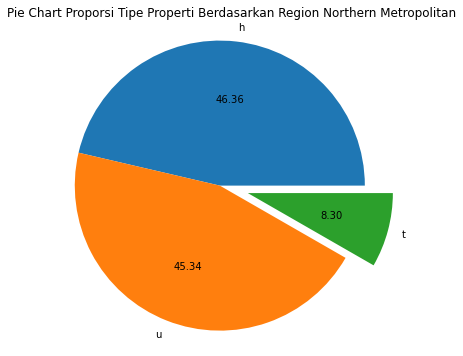

In [396]:
plt.figure(figsize=(8,6))
plt.pie(
    n_metro,
    labels=n_metro.index,
    autopct='%.2f',
    explode=(0,0,0.2)
)
plt.axis('equal')
plt.title('Pie Chart Proporsi Tipe Properti Berdasarkan Region Northern Metropolitan')
plt.show()

In [394]:
#Southern Metropolitan
s_metro=df[df['Regionname']=='Southern Metropolitan']['Type'].value_counts()
s_metro

u    250
h    135
t     14
Name: Type, dtype: int64

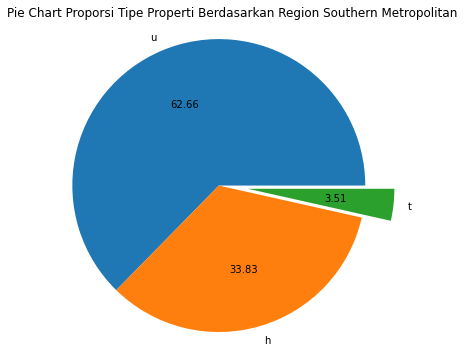

In [401]:
plt.figure(figsize=(8,6))
plt.pie(
    s_metro,
    labels=s_metro.index,
    autopct='%.2f',
    explode=(0,0,0.2)
)
plt.axis('equal')
plt.title('Pie Chart Proporsi Tipe Properti Berdasarkan Region Southern Metropolitan')
plt.show()

In [402]:
#Western Metropolitan
w_metro=df[df['Regionname']=='Western Metropolitan']['Type'].value_counts()
w_metro

h    154
u     46
t     36
Name: Type, dtype: int64

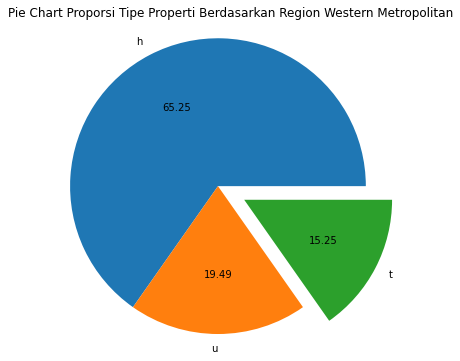

In [403]:
plt.figure(figsize=(8,6))
plt.pie(
    w_metro,
    labels=w_metro.index,
    autopct='%.2f',
    explode=(0,0,0.2)
)
plt.axis('equal')
plt.title('Pie Chart Proporsi Tipe Properti Berdasarkan Region Western Metropolitan')
plt.show()

### 4.1.3 Saran Terhadap Calon Pembeli Terkait Pemilihan Berdasarkan Lokasi Properti
Selanjutnya, calon pembeli akan diberikan pertimbangan mengenai tujuan pembelian property dan aktivitas sehari-harinya. Apakah si calon pembeli ini merupakan seorang yang masih bekerja atau memang ingin pensiun atau memang membeli rumah untuk rekreasi saja.      
* Dapat dilihat bahwa pada region `Western Metropolitan` memiliki jarak yang jauh dari `BCD (Bussines Central District)` dengan   tipe properti **h** yang paling banyak, sehingga region ini cocok untuk pembeli yang bukan pekerja kantoran ataupun hanya membeli property untuk wisata saja atau mungkin cocok untuk para pensiunan.
* Dapat dilihat pada region `Northern Metropolitan` dan `Southern Metropolitan` memiliki jarak terdekat dengan `BCD (Bussines Central District)`, sehingga sangat cocok untuk para pekerja kantor yang ingin memiliki properti tidak jauh dari tempat kerjanya. Tipe properti pada region ini kebanyakan adalah apartmen yang tidak memiliki landsize **(u)**.

* Untuk para pekerja kantoran, beberapa suburb seperti **`Maribyrnong, Melbourne, West Melbourne, Southbank, East Melbounre, Carlton`** merupakan daerah yang cocok untuk membeli property dengan `harga murah (Apartment/Tipe u)` dan `dekat dengan BCD (Bussines Central District)`.
* Untuk para pensiunan ataupun orang yang akan mencari properti untuk beristirahat, cocok membeli properti di suburb seperti **`Kensington, Princess Hill, Flemington, Travancore`** dengan `tipe properti yang paling banyak ditemukan adalah tipe h` yang berisikan rumah, villa, dll dan memang memiliki harga yang relatif mahal dibandingkan tipe properti lainnya.

## 4.2. Pemilihan Properti Berdasarkan Spesifikasi

### 4.2.1 Luas Bangunan dan Jumlah Ruangan Properti

* Berdasarkan perbandingn Luas Bangunan dan Harga, Region `Western Metropolitan` memiliki properti dengan harga yang relatif murah dengan luas bangunan yang besar, selain itu properti pada Region `Western Metropolitan` memiliki jumlah kamar yang lebih banyak dibandingkan properti di region lainnya.
* Pada suburbs `Southbank, West Melbourne, Carlton, Maribyrnong`, luas bangunan yang dimiliki cenderung lebih kecil, namun harga lebih mahal. Pada suburbs`Kensington, Flemington, Princess Hill`, luas bangunan yang besar dan harga cenderung lebih murah.

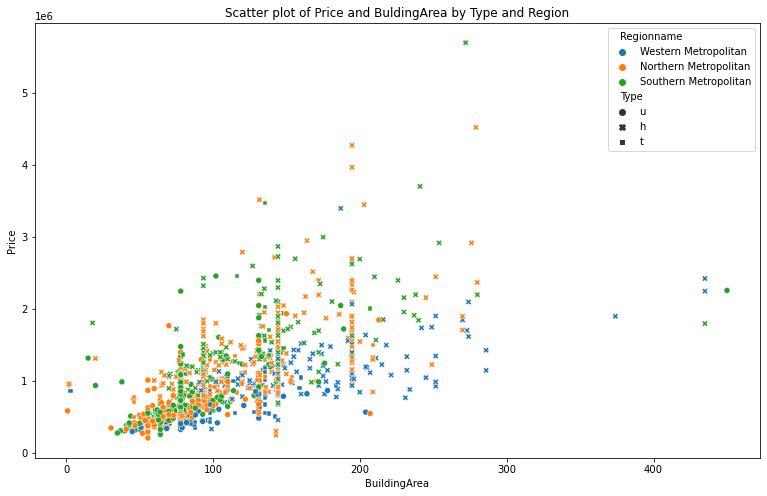

In [405]:
plt.figure(figsize=(13,8))
sns.scatterplot(data=df, x='BuildingArea', y='Price', hue='Regionname', style='Type')
plt.title('Scatter plot of Price and BuldingArea by Type and Region', size=12)
plt.show()

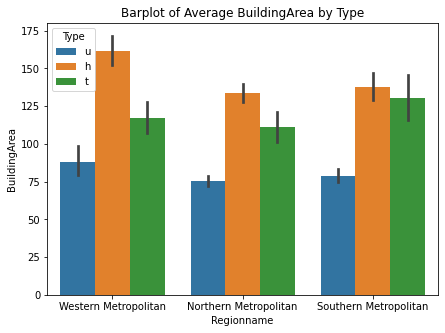

In [411]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Regionname', y='BuildingArea', estimator=np.mean, hue='Type')
plt.title('Barplot of Average BuildingArea by Type')
plt.show()

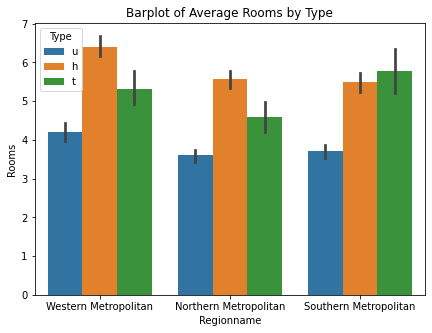

In [412]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Regionname', y='Rooms', estimator=np.mean, hue='Type')
plt.title('Barplot of Average Rooms by Type')
plt.show()

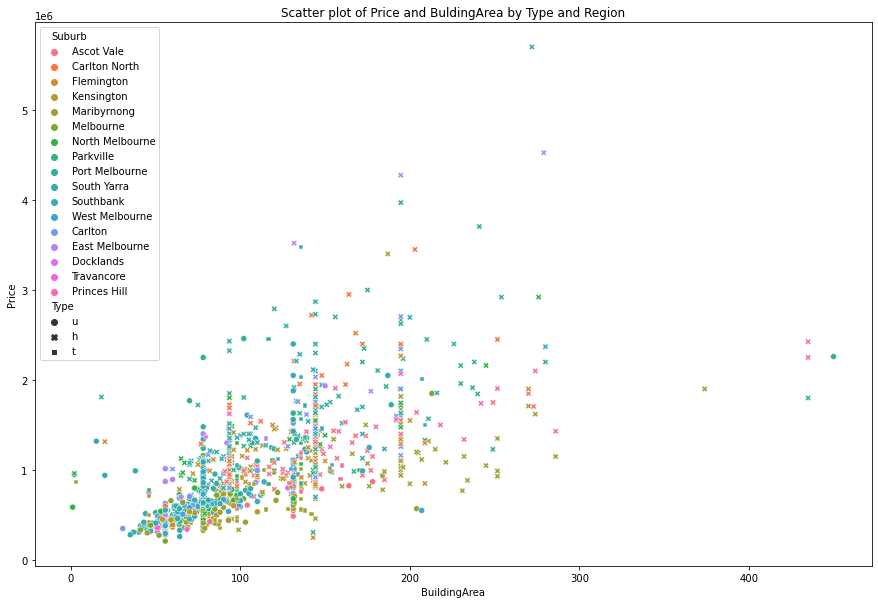

In [414]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='BuildingArea', y='Price', hue='Suburb', style='Type')
plt.title('Scatter plot of Price and BuldingArea by Type and Region', size=12)
plt.show()

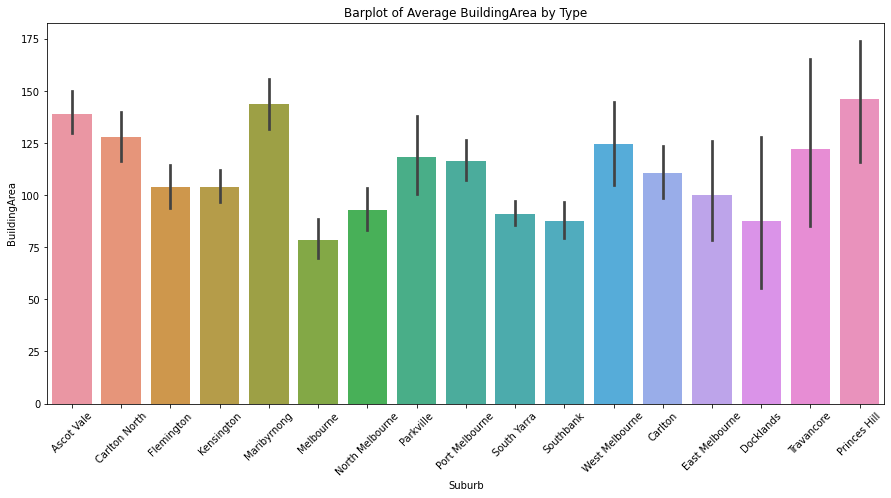

In [418]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='Suburb', y='BuildingArea', estimator=np.mean)
plt.title('Barplot of Average BuildingArea by Type')
plt.xticks(rotation=45)
plt.show()

### 4.2.2 Luas Tanah Properti

Jika ingin mengambil properti dengan harga murah namun dengan luas tanah yang besar, maka daerah western metropolitan adalah region yang tepat. Untuk region Northern Metropolitan dan Southern Metropolotan memiliki luas tanah yang kecil namun harga mahal

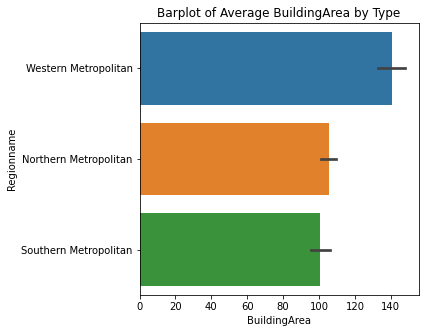

In [276]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, y='Regionname', x='BuildingArea', estimator=np.mean, orient='h')
plt.title('Barplot of Average BuildingArea by Type')
plt.show()

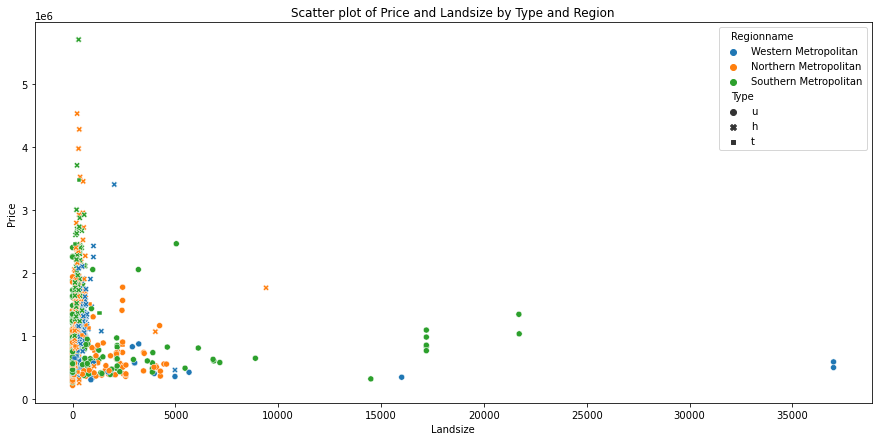

In [419]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Landsize', y='Price', hue='Regionname', style='Type')
plt.title('Scatter plot of Price and Landsize by Type and Region', size=12)
plt.show()

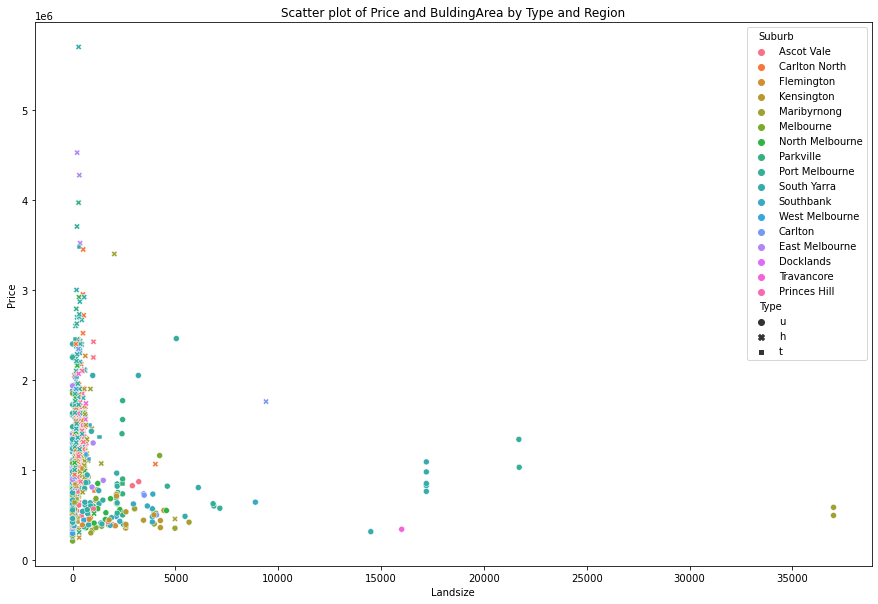

In [420]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='Landsize', y='Price', hue='Suburb', style='Type')
plt.title('Scatter plot of Price and BuldingArea by Type and Region', size=12)
plt.show()

In [ ]:
## 4.3 Kesimpulan dan Saran

In [431]:
#df1.groupby('Date', as_index=False).mean().sort_values(by='Propertycount', ascending=False)